In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install Quandl

In [3]:
import quandl

In [4]:
stocks = ["BSE/BOM532215", "BSE/BOM500180", "BSE/BOM532174", "BSE/BOM532648", "BSE/BOM500116"]
banks = ["Axis", "HDFC", "ICICI", "Yes", "IDBI"]
data = []
# Axis, HDFC, ICICI, YES, IDBI

for i in range(len(banks)):
  data.append(quandl.get(stocks[i]))
  data[i].reset_index(inplace=True)
  print(data[i])

           Date    Open  ...  Spread H-L  Spread C-O
0    1998-11-27   17.75  ...        4.20       -0.75
1    1998-11-30   16.25  ...        1.00       -0.20
2    1998-12-01   16.45  ...        1.20        0.50
3    1998-12-02   16.80  ...        0.60        0.15
4    1998-12-03   17.20  ...        0.60       -0.25
...         ...     ...  ...         ...         ...
5488 2020-12-18  605.40  ...       14.45        4.05
5489 2020-12-21  607.00  ...       33.35      -24.40
5490 2020-12-22  582.60  ...       25.30        7.05
5491 2020-12-23  590.00  ...       10.50        2.35
5492 2020-12-24  595.00  ...       18.70       15.35

[5493 rows x 13 columns]
           Date     Open  ...  Spread H-L  Spread C-O
0    1995-05-26    42.00  ...        6.50       -2.00
1    1995-05-29    39.00  ...        1.50        0.25
2    1995-05-30    39.00  ...        1.00        0.50
3    1995-05-31    39.75  ...        0.75        0.50
4    1996-04-02    33.00  ...        2.00        1.75
...         ..

Axis
HDFC
ICICI
Yes
IDBI


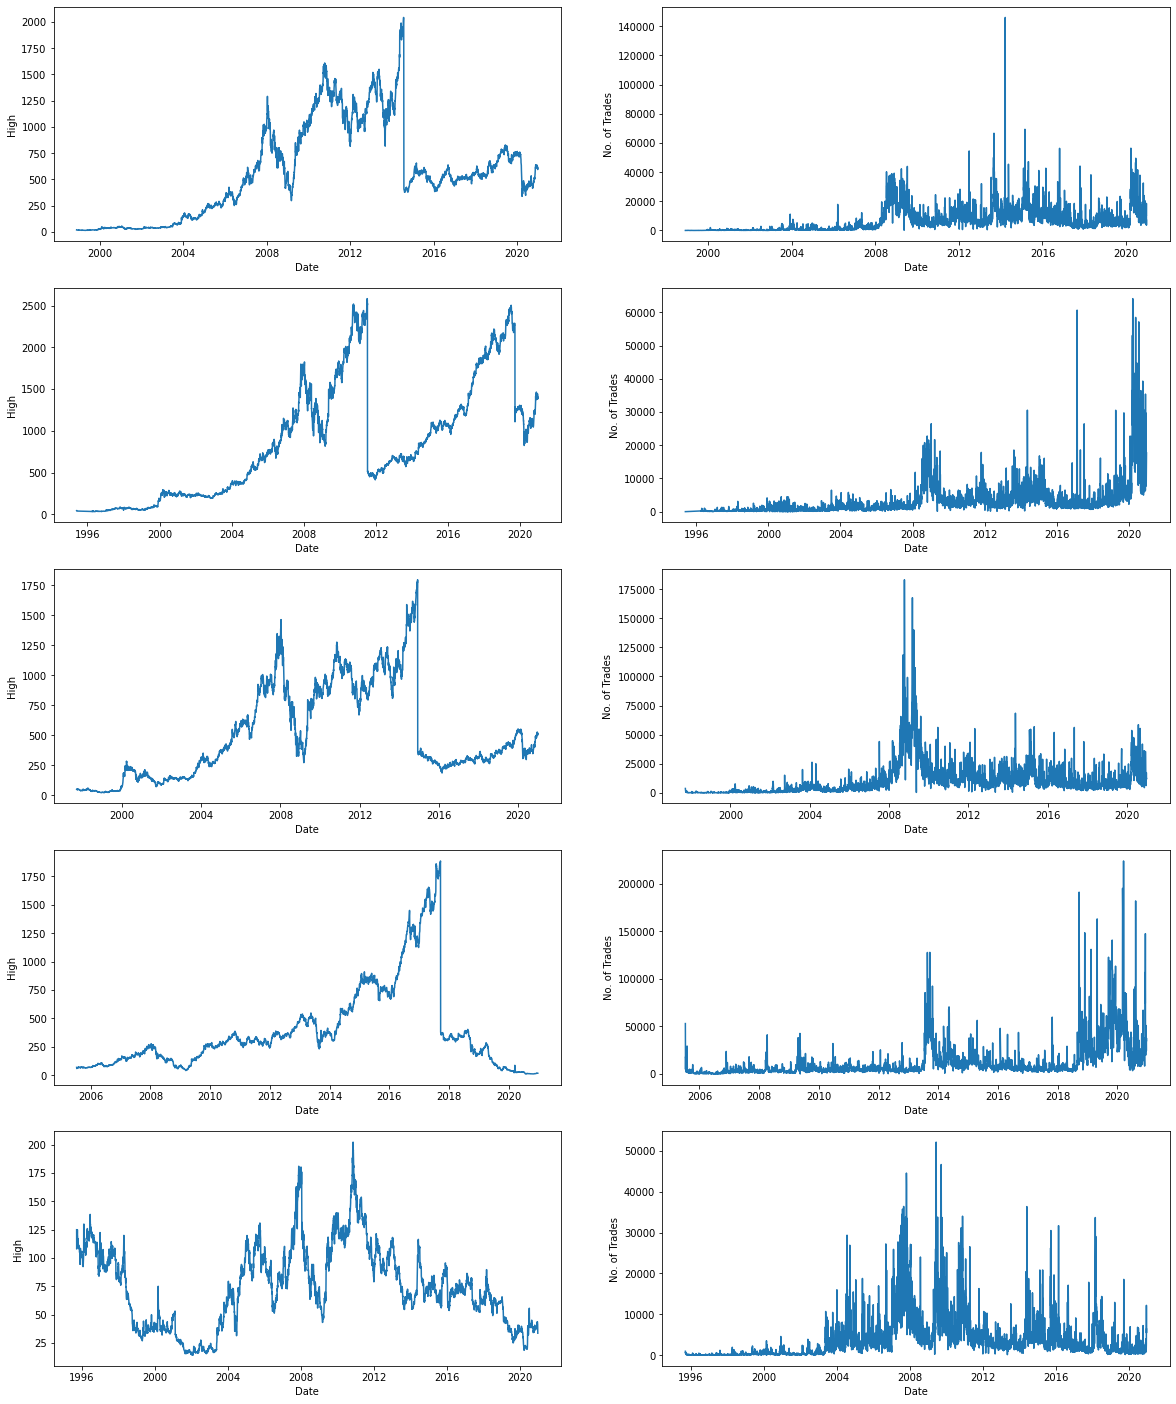

In [5]:
fig, ax = plt.subplots(5,2, figsize=(20,25))

for i in range(len(banks)):
  print(banks[i])
  sns.lineplot(x=data[i]['Date'], y=data[i]['High'], ax=ax[i,0])
  sns.lineplot(x=data[i]['Date'], y=data[i]['No. of Trades'], ax=ax[i,1])

fig.show()

In [6]:
for i in range(len(banks)):
  data[i]['Bank Name'] = banks[i]

all_data = pd.concat(data)
all_data.reset_index(drop=True)

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Bank Name
0,1998-11-27,17.75,17.75,13.55,17.00,16.057143,4200.0,27.0,67440.0,NaN,NaN,4.20,-0.75,Axis
1,1998-11-30,16.25,16.50,15.50,16.05,15.895455,26400.0,99.0,419640.0,NaN,NaN,1.00,-0.20,Axis
2,1998-12-01,16.45,17.30,16.10,16.95,16.879960,24700.0,115.0,416935.0,NaN,NaN,1.20,0.50,Axis
3,1998-12-02,16.80,17.20,16.60,16.95,16.988742,15100.0,70.0,256530.0,NaN,NaN,0.60,0.15,Axis
4,1998-12-03,17.20,17.45,16.85,16.95,17.152941,20400.0,90.0,349920.0,NaN,NaN,0.60,-0.25,Axis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27502,2020-12-18,41.80,41.80,40.00,40.50,40.430000,241029.0,1247.0,9745159.0,112866.0,46.83,1.80,-1.30,IDBI
27503,2020-12-21,40.55,41.70,37.20,38.10,39.240000,520579.0,2795.0,20425439.0,199301.0,38.28,4.50,-2.45,IDBI
27504,2020-12-22,37.25,37.60,30.80,33.85,33.010000,4389928.0,12192.0,144892364.0,1399764.0,31.89,6.80,-3.40,IDBI
27505,2020-12-23,34.20,34.25,32.70,32.90,33.360000,1537812.0,5440.0,51306335.0,814242.0,52.95,1.55,-1.30,IDBI


In [7]:
all_data.isna().sum()

Date                            0
Open                            0
High                            0
Low                             0
Close                           0
WAP                             0
No. of Shares                   0
No. of Trades                   0
Total Turnover                  0
Deliverable Quantity         4946
% Deli. Qty to Traded Qty    4946
Spread H-L                      0
Spread C-O                      0
Bank Name                       0
dtype: int64

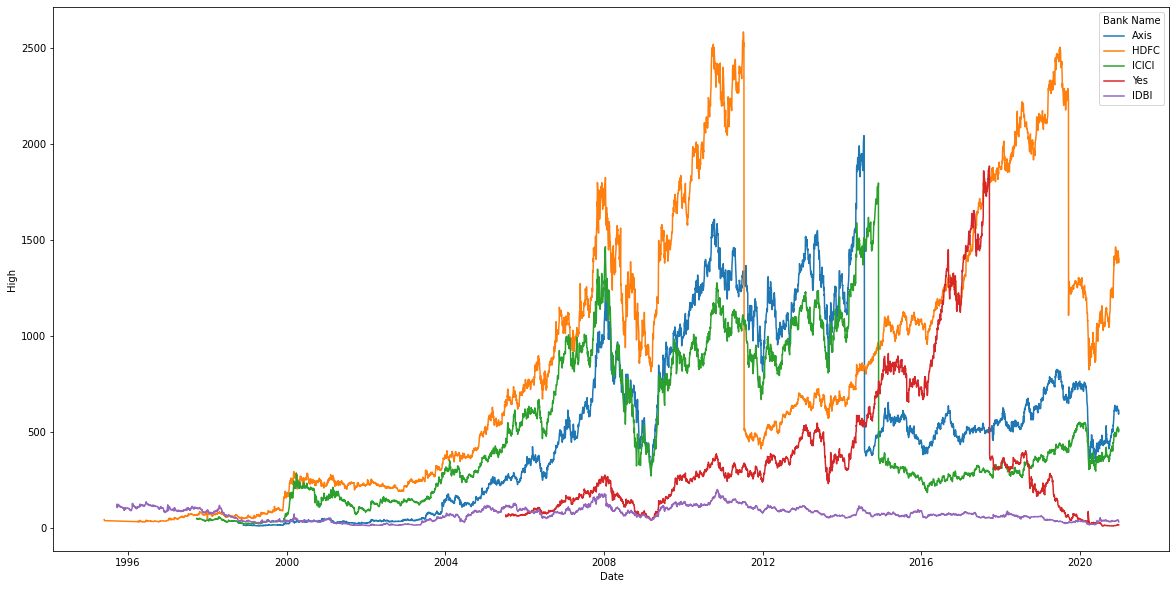

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=all_data, x="Date", y="High", hue="Bank Name", ax=ax)
fig.show()

In [9]:
# Take all close prices of individual stocks
all_prices = pd.DataFrame()
all_prices['Axis'] = data[0]['Close'][1661:]
all_prices['HDFC'] = data[1]['Close'][1661:]
all_prices['ICICI'] = data[2]['Close'][1661:]
all_prices['IDBI'] = data[4]['Close'][1661:]
all_prices = all_prices.reset_index(drop=True)
all_prices['Yes'] = data[3]['Close']
all_prices

,Axis,HDFC,ICICI,IDBI,Yes
0,268.10,218.20,246.35,22.55,60.80
1,266.10,221.15,230.35,23.05,58.50
2,261.25,219.05,236.50,23.45,57.30
3,251.85,218.55,261.60,24.05,61.75
4,253.00,218.00,266.15,23.70,64.25
...,...,...,...,...,...
3827,609.45,1966.60,471.05,60.75,18.88
3828,582.60,1979.00,462.85,60.15,17.94
3829,589.65,1989.70,462.10,58.75,17.34
3830,592.35,2010.65,470.35,59.45,17.60


In [10]:
all_prices['Date'] = data[3]['Date']
all_prices

,Axis,HDFC,ICICI,IDBI,Yes,Date
0,268.10,218.20,246.35,22.55,60.80,2005-07-12
1,266.10,221.15,230.35,23.05,58.50,2005-07-13
2,261.25,219.05,236.50,23.45,57.30,2005-07-14
3,251.85,218.55,261.60,24.05,61.75,2005-07-15
4,253.00,218.00,266.15,23.70,64.25,2005-07-18
...,...,...,...,...,...,...
3827,609.45,1966.60,471.05,60.75,18.88,2020-12-18
3828,582.60,1979.00,462.85,60.15,17.94,2020-12-21
3829,589.65,1989.70,462.10,58.75,17.34,2020-12-22
3830,592.35,2010.65,470.35,59.45,17.60,2020-12-23


In [11]:
axisbank = all_prices['Axis']
short_rolling_axis = axisbank.rolling(window=20).mean()
long_rolling_axis = axisbank.rolling(window=100).mean()

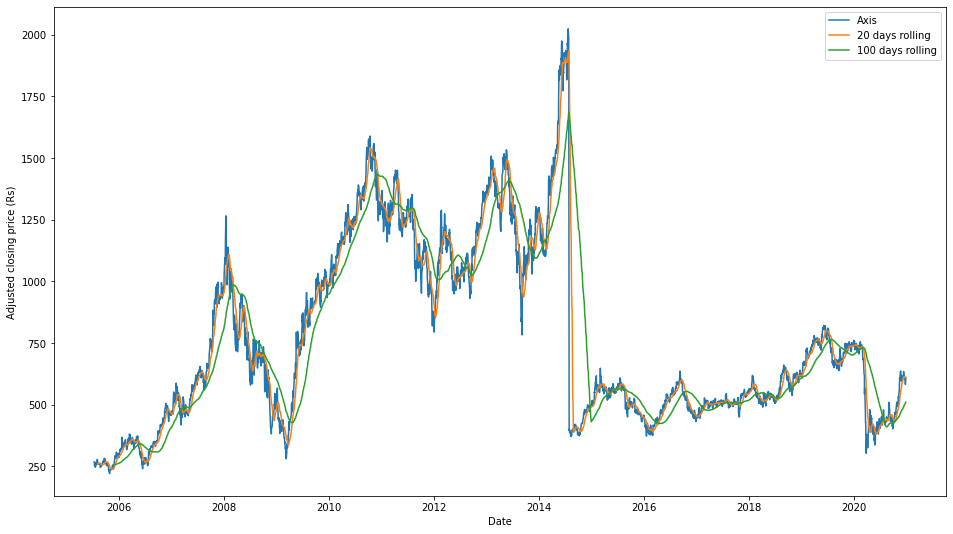

In [12]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data[3]['Date'], axisbank, label='Axis')
ax.plot(data[3]['Date'], short_rolling_axis, label='20 days rolling')
ax.plot(data[3]['Date'], long_rolling_axis, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (Rs)')
ax.legend()

In [13]:
all_prices = all_prices.set_index('Date')
all_prices

,Axis,HDFC,ICICI,IDBI,Yes
Date,,,,,
2005-07-12,268.10,218.20,246.35,22.55,60.80
2005-07-13,266.10,221.15,230.35,23.05,58.50
2005-07-14,261.25,219.05,236.50,23.45,57.30
2005-07-15,251.85,218.55,261.60,24.05,61.75
2005-07-18,253.00,218.00,266.15,23.70,64.25
...,...,...,...,...,...
2020-12-18,609.45,1966.60,471.05,60.75,18.88
2020-12-21,582.60,1979.00,462.85,60.15,17.94
2020-12-22,589.65,1989.70,462.10,58.75,17.34


In [14]:
returns = all_prices.pct_change(1)
returns.head()

,Axis,HDFC,ICICI,IDBI,Yes
Date,,,,,
2005-07-12,NaN,NaN,NaN,NaN,NaN
2005-07-13,-0.007460,0.013520,-0.064948,0.022173,-0.037829
2005-07-14,-0.018226,-0.009496,0.026699,0.017354,-0.020513
2005-07-15,-0.035981,-0.002283,0.106131,0.025586,0.077661
2005-07-18,0.004566,-0.002517,0.017393,-0.014553,0.040486


In [15]:
log_returns = np.log(all_prices).diff()
log_returns.head()

,Axis,HDFC,ICICI,IDBI,Yes
Date,,,,,
2005-07-12,NaN,NaN,NaN,NaN,NaN
2005-07-13,-0.007488,0.013429,-0.067153,0.021931,-0.038563
2005-07-14,-0.018394,-0.009541,0.026348,0.017205,-0.020726
2005-07-15,-0.036644,-0.002285,0.100868,0.025265,0.074793
2005-07-18,0.004556,-0.002520,0.017243,-0.014660,0.039688


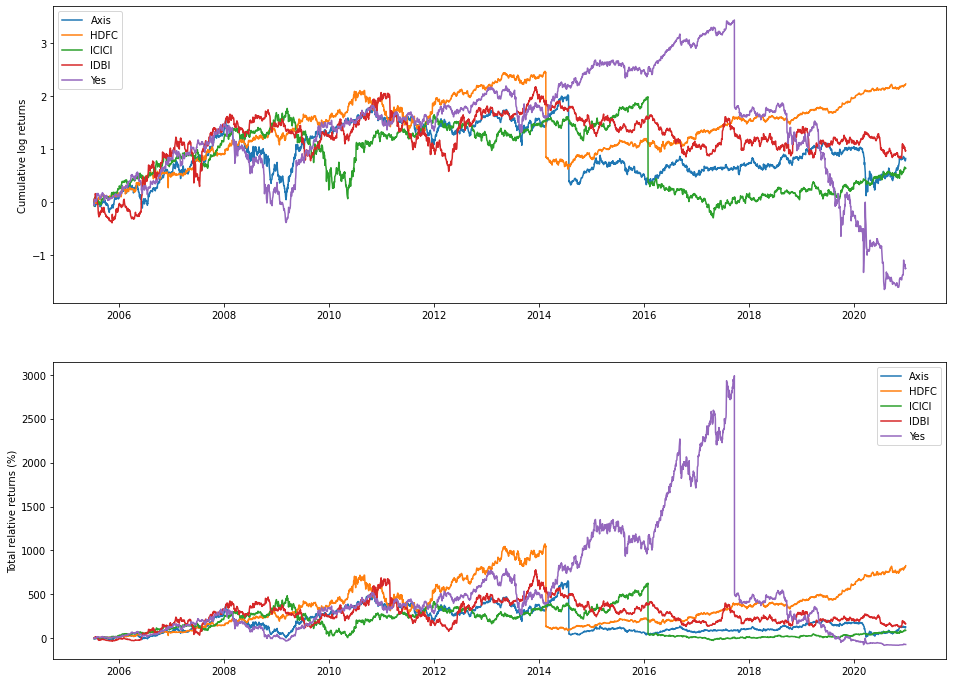

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [17]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

Date,2020-12-24
Axis,0.029935
HDFC,0.005233
ICICI,-0.004475
IDBI,0.002520
Yes,-0.002845


In [18]:
# Weights as defined above
weights_vector = pd.DataFrame(1 / 5, index=r_t.index, columns=r_t.columns)
weights_vector

Date,2020-12-24
Axis,0.2
HDFC,0.2
ICICI,0.2
IDBI,0.2
Yes,0.2


In [19]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

Date,2020-12-24
Date,
2020-12-24,0.006074


In [20]:
weights_matrix = pd.DataFrame(1 / 5, index=all_prices.index, columns=all_prices.columns)
weights_matrix.tail()

,Axis,HDFC,ICICI,IDBI,Yes
Date,,,,,
2020-12-18,0.2,0.2,0.2,0.2,0.2
2020-12-21,0.2,0.2,0.2,0.2,0.2
2020-12-22,0.2,0.2,0.2,0.2,0.2
2020-12-23,0.2,0.2,0.2,0.2,0.2
2020-12-24,0.2,0.2,0.2,0.2,0.2


In [21]:
log_returns.head()

,Axis,HDFC,ICICI,IDBI,Yes
Date,,,,,
2005-07-12,NaN,NaN,NaN,NaN,NaN
2005-07-13,-0.007488,0.013429,-0.067153,0.021931,-0.038563
2005-07-14,-0.018394,-0.009541,0.026348,0.017205,-0.020726
2005-07-15,-0.036644,-0.002285,0.100868,0.025265,0.074793
2005-07-18,0.004556,-0.002520,0.017243,-0.014660,0.039688


In [22]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

Date,2005-07-12,2005-07-13,2005-07-14,2005-07-15,2005-07-18
Date,,,,,
2005-07-12,NaN,-0.015569,-0.001022,0.032399,0.008861
2005-07-13,NaN,-0.015569,-0.001022,0.032399,0.008861
2005-07-14,NaN,-0.015569,-0.001022,0.032399,0.008861
2005-07-15,NaN,-0.015569,-0.001022,0.032399,0.008861
2005-07-18,NaN,-0.015569,-0.001022,0.032399,0.008861


In [23]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

Date
2020-12-18   -0.004965
2020-12-21   -0.023466
2020-12-22   -0.008354
2020-12-23    0.011893
2020-12-24    0.006074
dtype: float64

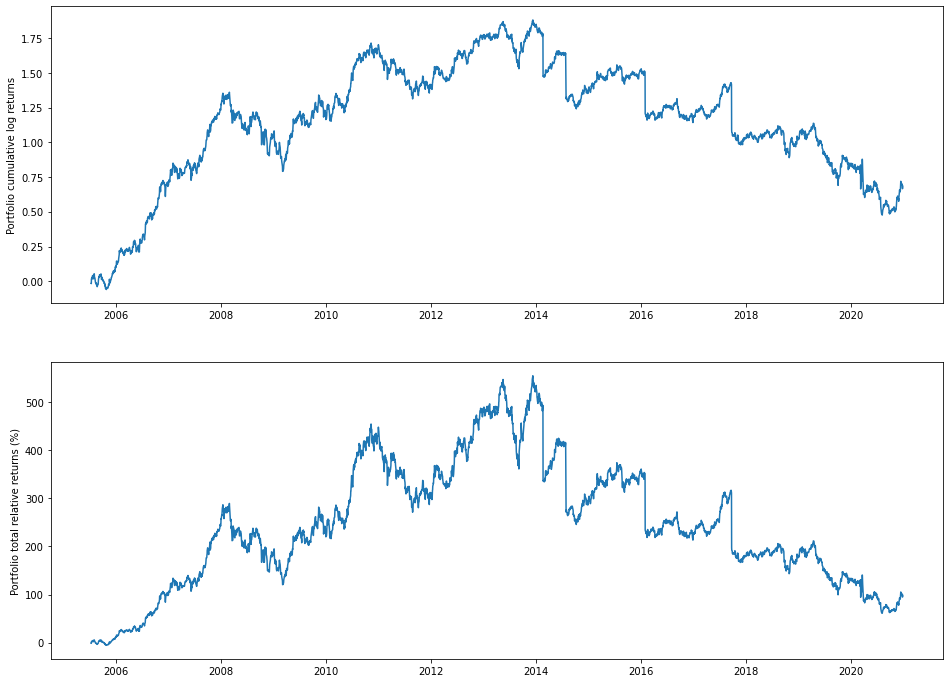

In [24]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [25]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = all_prices.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 98.19%
Average yearly return is:  4.75%
